# Testing the Optimizer with Synthetic Data


- To validate the base model’s performance, we tested it on synthetic user data, an incredibly useful approach when device-level data is not yet available or too sensitive to share.
- Working with synthetic data, we can replicate device scope 2 emissions avoidance potential with and without an automated marginal emissions reduction solution.

In [1]:
import os
os.chdir(path=os.path.dirname(os.path.dirname(os.path.abspath(os.curdir))))

In [2]:
from watttime_optimizer.evaluator.sessions import SessionsGenerator

## Example: At home EV charging

Ideally, the base solution’s short-term impact will be in shortening the product development lifecycle of custom software solutions designed to support AER features. To shape the base model, we worked with WattTime to isolate a common set of functional behaviors for potential low-carbon devices and translate these patterns and users’ behavior into mathematical functions that can be optimized. This first set is intended to serve as a base model for more complex solutions. 


### Functional Behavior + Device Characteristics
- Covers a 5.5 - 8.5 hour variable length window
- The vehicle has a BMW and has an average power draw of 42.5
- Battery is usually typically 50% charged at plug in time.
- Charging occurs during the workdayz

In [3]:
ev_kwargs = {
    "max_power_output_rates": [42.5],
    "max_percent_capacity": 0.95,  # highest level of charge achieved by battery
    "power_output_efficiency": 0.75,  # power loss. 1 = no power loss.
    "minimum_battery_starting_capacity": 0.2,  # minimum starting percent charged
    "minimum_usage_window_start_time": "08:00:00",  # session can start as early as 8am
    "maximum_usage_window_start_time": "22:00:00",  # session can start as late as 9pm
}

In [4]:
s_ev = SessionsGenerator(**ev_kwargs)

Now we can generate synthetic data for users and devices with the attributes set above.

In [5]:
# the class has a helper function to generate a random list of unique dates
distinct_date_list = s_ev.assign_random_dates(years=[2025])

You can generate data for a *single* user for each distinct date

In [6]:
s_ev.synthetic_user_data(distinct_date_list=[distinct_date_list[0]]).T

,0
distinct_dates,2025-01-10
user_type,r21.4625_tc91_avglc27109_sdlc7283
usage_window_start,2025-01-10 21:40:00
usage_window_end,2025-01-11 07:10:00
initial_charge,0.55324
time_needed,100
expected_baseline_charge_complete_timestamp,2025-01-10 23:20:00
window_length_in_minutes,570.0
final_charge_time,2025-01-10 23:20:00
total_capacity,91


Or for *multiple* users.

In [7]:
s_ev.generate_synthetic_dataset(distinct_date_list=[distinct_date_list[0]], number_of_users=10)

100%|██████████| 10/10 [00:00<00:00, 335.21it/s]


,index,distinct_dates,user_type,usage_window_start,usage_window_end,initial_charge,time_needed,expected_baseline_charge_complete_timestamp,window_length_in_minutes,final_charge_time,total_capacity,usage_power_kw,total_intervals_plugged_in,MWh_fraction,early_session_stop
0,0,2025-01-10,r28.687500000000004_tc118_avglc20546_sdlc7920,2025-01-10 12:15:00,2025-01-10 18:10:00,0.380963,140,2025-01-10 14:35:00,355.0,2025-01-10 14:35:00,118,28.6875,71.0,0.002391,False
1,0,2025-01-10,r24.735_tc112_avglc24834_sdlc7708,2025-01-10 21:40:00,2025-01-11 05:50:00,0.535900,112,2025-01-10 23:32:00,490.0,2025-01-10 23:32:00,112,24.7350,98.0,0.002061,False
2,0,2025-01-10,r30.7275_tc45_avglc23403_sdlc7030,2025-01-10 08:55:00,2025-01-10 15:35:00,0.793005,13,2025-01-10 09:08:00,400.0,2025-01-10 09:08:00,45,30.7275,80.0,0.002561,False
3,0,2025-01-10,r34.765_tc38_avglc28725_sdlc7230,2025-01-10 08:55:00,2025-01-10 16:10:00,0.326142,40,2025-01-10 09:35:00,435.0,2025-01-10 09:35:00,38,34.7650,87.0,0.002897,False
4,0,2025-01-10,r33.32_tc34_avglc22081_sdlc7195,2025-01-10 10:05:00,2025-01-10 17:45:00,0.676138,16,2025-01-10 10:21:00,460.0,2025-01-10 10:21:00,34,33.3200,92.0,0.002777,False
5,0,2025-01-10,r24.735_tc32_avglc20715_sdlc6902,2025-01-10 08:05:00,2025-01-10 13:30:00,0.525689,32,2025-01-10 08:37:00,325.0,2025-01-10 08:37:00,32,24.7350,65.0,0.002061,False
6,0,2025-01-10,r32.8525_tc76_avglc29495_sdlc7274,2025-01-10 08:10:00,2025-01-10 16:25:00,0.647882,41,2025-01-10 08:51:00,495.0,2025-01-10 08:51:00,76,32.8525,99.0,0.002738,False
7,0,2025-01-10,r34.3825_tc107_avglc23121_sdlc7297,2025-01-10 19:15:00,2025-01-11 01:00:00,0.608428,63,2025-01-10 20:18:00,345.0,2025-01-10 20:18:00,107,34.3825,69.0,0.002865,False
8,0,2025-01-10,r35.2325_tc67_avglc24281_sdlc7101,2025-01-10 15:10:00,2025-01-10 23:45:00,0.628492,36,2025-01-10 15:46:00,515.0,2025-01-10 15:46:00,67,35.2325,103.0,0.002936,False
9,0,2025-01-10,r28.900000000000002_tc70_avglc24076_sdlc7798,2025-01-10 21:10:00,2025-01-11 02:35:00,0.659718,42,2025-01-10 21:52:00,325.0,2025-01-10 21:52:00,70,28.9000,65.0,0.002408,False


## Example: AI Model Training


### Functional Behavior
- Worloads can run at any time of day
- Our 3 server models consume 24, 31, and 64 kWh on average


In [8]:
ai_kwargs = {
    "max_percent_capacity":1.0, # job must run to completion
    "max_power_output_rates": [24,31,64],
    "minimum_usage_window_start_time": "00:00:00",  # earliest session can start
    "maximum_usage_window_start_time": "23:59:00",  # latest session can start
}

In [9]:
s_ai = SessionsGenerator(**ai_kwargs)

In [10]:
df_ai = s_ai.generate_synthetic_dataset(distinct_date_list=distinct_date_list, number_of_users=10)

100%|██████████| 10/10 [00:00<00:00, 280.14it/s]


In [11]:
df_ai.head().T

,0,1,2,3,4
index,0,1,2,3,4
distinct_dates,2025-01-10,2025-01-12,2025-01-17,2025-01-18,2025-01-23
user_type,r42.048_tc97_avglc23328_sdlc6978,r42.048_tc97_avglc23328_sdlc6978,r42.048_tc97_avglc23328_sdlc6978,r42.048_tc97_avglc23328_sdlc6978,r42.048_tc97_avglc23328_sdlc6978
usage_window_start,2025-01-10 01:10:00,2025-01-12 16:50:00,2025-01-17 17:35:00,2025-01-18 11:35:00,2025-01-23 22:45:00
usage_window_end,2025-01-10 05:45:00,2025-01-12 21:00:00,2025-01-18 00:35:00,2025-01-18 20:40:00,2025-01-24 05:10:00
initial_charge,0.713798,0.421567,0.28111,0.561354,0.706594
time_needed,39,80,99,60,40
expected_baseline_charge_complete_timestamp,2025-01-10 01:49:00,2025-01-12 18:10:00,2025-01-17 19:14:00,2025-01-18 12:35:00,2025-01-23 23:25:00
window_length_in_minutes,275.0,250.0,420.0,545.0,385.0
final_charge_time,2025-01-10 01:49:00,2025-01-12 18:10:00,2025-01-17 19:14:00,2025-01-18 12:35:00,2025-01-23 23:25:00


# Optimization

In [12]:
import pandas as pd
from watttime_optimizer.evaluator.evaluator import OptChargeEvaluator
from watttime_optimizer.evaluator.evaluator import ImpactEvaluator

### The WattTimeOptimizer class requires 4 things:

- Watttime’s forecast of marginal emissions (MOER) - be ready to provide your username and password
- device capacity and energy needs
- region
- window start
- window end

In [13]:
username = os.getenv("WATTTIME_USER")
password = os.getenv("WATTTIME_PASSWORD")
region = "PJM_CHICAGO"
oce = OptChargeEvaluator(username=username,password=password)

In [14]:
# single instance
df_ev_sample = s_ev.synthetic_user_data(distinct_date_list=[distinct_date_list[0]])

In [15]:
input_dict = df_ev_sample[['usage_window_start',
                    'usage_window_end',
                    'time_needed',
                    'usage_power_kw'
                    ]].T.to_dict()

value = input_dict[0]
value.update({'region':region,'tz_convert':True, "verbose":False})

In [16]:
df = oce.get_schedule_and_cost_api(**value)
rr = ImpactEvaluator(username,password,df).get_all_emissions_values(region=region)

<Axes: xlabel='point_time'>

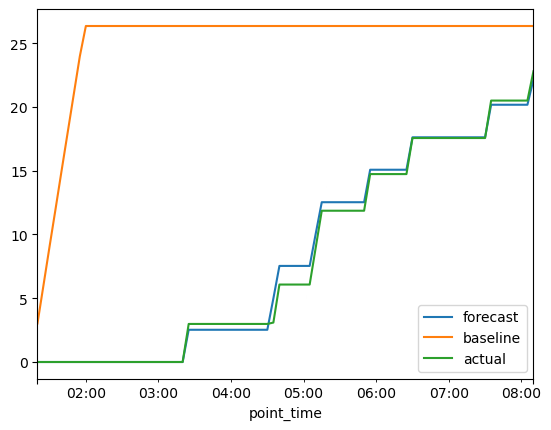

In [17]:
rr.cumsum().plot()

In [18]:
rr_metrics = ImpactEvaluator(username,password,df).get_all_emissions_metrics(region=region)

In [19]:
rr_metrics

{'baseline': 26.349219416666664,
 'forecast': 22.1546754,
 'actual': 22.807821208333333}

In [20]:
df.sum()

pred_moer           97714.900000
usage                  44.000000
emissions_co2_lb       22.154675
energy_usage_mwh        0.020913
dtype: float64

# Requery

- The intuition behind requerying is that more recent forecasts more accurately reflect what is likely to happen on the grid within the session window. 
- An extension of this assumption is that the higher the update frequency, the greater the improvement in overall results. 

In [21]:
from watttime_optimizer.evaluator.evaluator import RecalculationOptChargeEvaluator

In [22]:
roce = RecalculationOptChargeEvaluator(username,password)

In [23]:
value.update({"optimization_method": "simple", "interval":15, "charge_per_segment":None})

In [24]:
%%timeit
%%capture
df_requery = roce.fit_recalculator(**value).get_combined_schedule()

3.39 s ± 368 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
df_requery.sum()

pred_moer           97714.900000
usage                  44.000000
emissions_co2_lb       22.154675
energy_usage_mwh        0.020913
dtype: float64

# Vizualizing Results

In [26]:
impact_evaluator = ImpactEvaluator(username=username,password=password,obj=df)

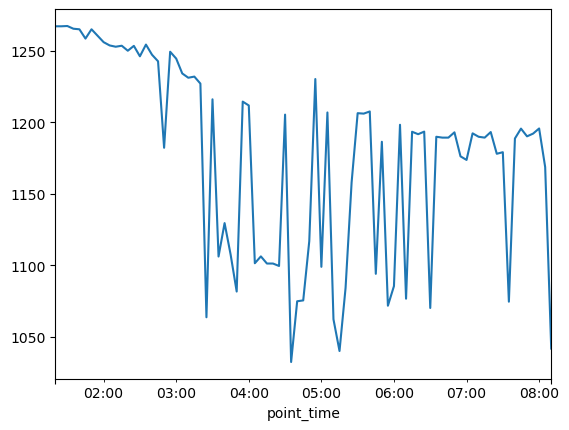

In [27]:
impact_evaluator.plot_predicated_moer()

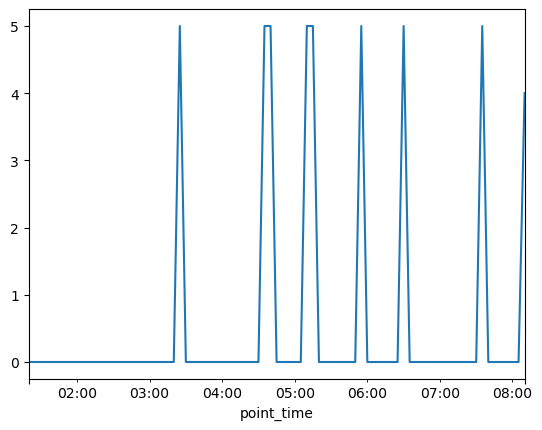

In [28]:
impact_evaluator.plot_usage_schedule()

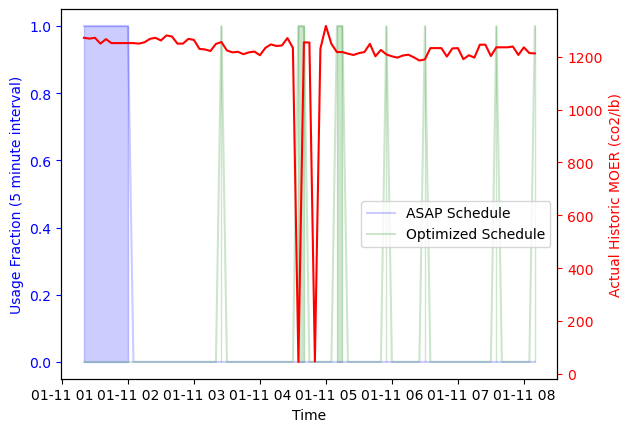

In [29]:
impact_evaluator.plot_impact(region=region)

Baseline, i.e. 'asap' is lower than optimized results

In [30]:
impact_evaluator.get_all_emissions_metrics(region=region)

{'baseline': 26.349219416666664,
 'forecast': 22.1546754,
 'actual': 22.807821208333333}

# Iterate over multiple rows of data

In [31]:
from watttime_optimizer.evaluator.analysis import analysis_loop

In [32]:
df_ev_samples = s_ev.generate_synthetic_dataset(distinct_date_list=distinct_date_list, number_of_users=10).sample(10)

input_dict = df_ev_samples[['usage_window_start',
                    'usage_window_end',
                    'time_needed',
                    'usage_power_kw'
                    ]].T.to_dict()

100%|██████████| 10/10 [00:00<00:00, 270.40it/s]


In [33]:
results = analysis_loop(
    region = "PJM_CHICAGO",
    input_dict = input_dict,
    username=username,
    password=password
)

 30%|███       | 3/10 [00:24<00:54,  7.77s/it]/Users/jen/watttime-python-client/watttime_optimizer/api_opt.py:195: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  forecast_df.index = pd.to_datetime(forecast_df.index)
/Users/jen/watttime-python-client/watttime/api.py:274: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["point_time"] = pd.to_datetime(df["point_time"])
/Users/jen/watttime-python-client/watttime/api.py:274: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["point_time"] = pd.to_datetime(df["point_time"])
100%|██████████| 10/10 [01:01<00:00,  6.20s/it]


In [34]:
results_loop = pd.DataFrame.from_dict(
    results,
    orient="index"
    )

In [40]:
results_loop

,baseline,forecast,actual,m,b,stddev,percent_difference
335,19.374900,17.364438,5.772350,-0.965979,1221.491835,36.154509,0.702071
248,47.119410,45.362598,46.858906,1.127139,1209.010418,35.813855,0.005529
187,99.036054,97.043829,97.403682,-0.960845,1377.716438,23.558332,0.016483
129,44.891362,43.965281,44.818082,-0.170719,1227.373027,10.085330,0.001632
347,40.716275,34.589730,30.394725,-2.414455,1241.087671,78.058167,0.253499
144,36.702892,31.103672,18.732846,-2.841039,1251.382335,65.568697,0.489608
250,72.399710,69.995388,30.788366,0.228903,1195.549966,38.837257,0.574745
99,50.243337,45.002552,46.479799,-0.546100,1247.550698,65.546905,0.074906
400,67.923815,61.153951,65.680911,-0.430136,1206.433224,38.390573,0.033021
87,19.178195,17.085137,17.947542,-1.261463,1271.073983,49.779445,0.064169


In [41]:
results_loop["percent_difference"] = (results_loop["actual"] - results_loop["baseline"]) / results_loop["baseline"]

<Axes: >

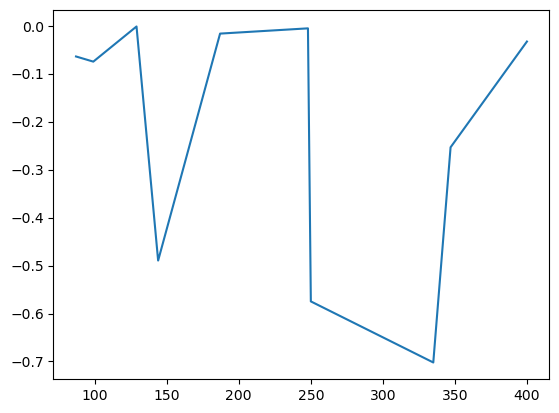

In [ ]:
# larger negative is better
results_loop["percent_difference"].sort_index().plot()

## Requery

In [43]:
from watttime_optimizer.evaluator.analysis import analysis_loop_requery

In [44]:
interval = 15
region = "PJM_CHICAGO"

In [45]:
%%capture
results_requery = analysis_loop_requery(region=region, interval=interval, input_dict=input_dict, username=username, password=password)

In [47]:
results_loop_requery = pd.DataFrame.from_dict(
    results_requery,
    orient="index"
    )

# Requery Contiguous

In [48]:
from watttime_optimizer.evaluator.analysis import analysis_loop_requery_contiguous

In [49]:
results_requery_c = analysis_loop_requery_contiguous(
    region=region,
    interval=interval,
    input_dict=input_dict,
    username=username,
    password=password
    )

  0%|          | 0/10 [00:00<?, ?it/s]

tz converting...


 10%|█         | 1/10 [00:04<00:41,  4.67s/it]

tz converting...


 20%|██        | 2/10 [00:10<00:41,  5.13s/it]

tz converting...


 30%|███       | 3/10 [00:15<00:36,  5.17s/it]

tz converting...


/Users/jen/watttime-python-client/watttime_optimizer/api_opt.py:195: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  forecast_df.index = pd.to_datetime(forecast_df.index)
/Users/jen/watttime-python-client/watttime/api.py:274: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["point_time"] = pd.to_datetime(df["point_time"])
/Users/jen/watttime-python-client/watttime/api.py:274: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["point_time"] = pd.to_datetime(df["point_time"])
 40%|████      | 4/10 [00:21<00:34,  5.67s/it]

tz converting...


 50%|█████     | 5/10 [00:27<00:27,  5.59s/it]

tz converting...


 60%|██████    | 6/10 [00:32<00:21,  5.37s/it]

tz converting...


 70%|███████   | 7/10 [00:37<00:15,  5.22s/it]

tz converting...


 80%|████████  | 8/10 [00:41<00:10,  5.09s/it]

tz converting...


 90%|█████████ | 9/10 [00:46<00:05,  5.07s/it]

tz converting...


100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


In [52]:
results_loop_requery_c = pd.DataFrame.from_dict(
    results_requery_c,
    orient="index"
    )

# Comparing Single Query vs Requery vs Requery Contigous

In [53]:
results_loop.head()

,baseline,forecast,actual,m,b,stddev,percent_difference
335,19.374900,17.364438,5.772350,-0.965979,1221.491835,36.154509,-0.702071
248,47.119410,45.362598,46.858906,1.127139,1209.010418,35.813855,-0.005529
187,99.036054,97.043829,97.403682,-0.960845,1377.716438,23.558332,-0.016483
129,44.891362,43.965281,44.818082,-0.170719,1227.373027,10.085330,-0.001632
347,40.716275,34.589730,30.394725,-2.414455,1241.087671,78.058167,-0.253499


In [64]:
results_all = results_loop_requery[["baseline","actual"]].merge(results_loop_requery_c["actual"], suffixes = ['_requery','_requery_c'], left_index=True, right_index=True).merge(results_loop["actual"], left_index=True, right_index=True)

<Axes: >

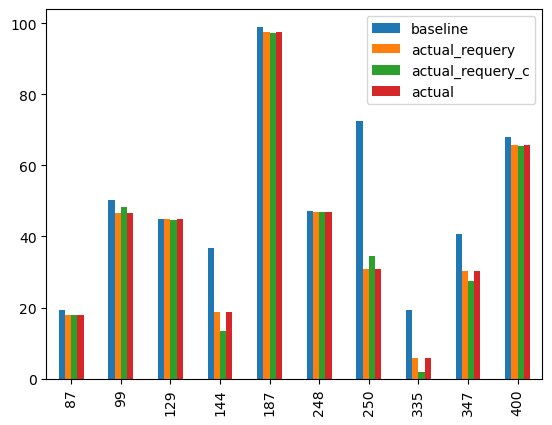

In [67]:
results_all.sort_index().plot(kind="bar")